<a href="https://colab.research.google.com/github/Mathurshab2210/Ml_with_Mathur/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv('/content/heart.csv')

In [4]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [5]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [6]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [7]:
df.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [10]:
df['Sex']=lb.fit_transform(df['Sex'])
df['ChestPainType']=lb.fit_transform(df['ChestPainType'])
df['RestingECG']=lb.fit_transform(df['RestingECG'])
df['ExerciseAngina']=lb.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=lb.fit_transform(df['ST_Slope'])

In [11]:
df.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

In [12]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
df.dropna()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         2             0  

[918 rows x 12 columns]

In [14]:
df.shape

(918, 12)

In [16]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [47]:
x_train.shape

(734, 11)

In [48]:
model= LogisticRegression()

In [49]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [50]:
traindatapred=model.predict(x_train)

In [51]:
#accuracy over train data
score=accuracy_score(y_train,traindatapred)

In [52]:
score

0.8501362397820164

In [53]:
testdatapred=model.predict(x_test)

In [54]:
#accuracy over test data
score=accuracy_score(y_test,testdatapred)

In [55]:
score

0.8695652173913043

In [56]:
y_test[0:10]

356    1
763    1
817    1
735    1
892    0
795    0
234    0
383    1
642    0
454    1
Name: HeartDisease, dtype: int64

In [57]:
testdatapred[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [58]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf=RandomForestClassifier(class_weight='balanced')

In [61]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [62]:
#train data score
traindatapred=rf.predict(x_train)

In [63]:
#acuracy on train
sc=accuracy_score(y_train,traindatapred)

In [64]:
sc

1.0

In [65]:
#test data score
testdatapred=rf.predict(x_test)

In [66]:
#acuracy on train
sc=accuracy_score(y_test,testdatapred)

In [67]:
sc

0.907608695652174

In [71]:
final=rf.predict([[40,	1,	1,	140,	289,	0,	1,	172,	0,	0.0,	2	]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [72]:
if final == 0:
  print('no heart disease')
else:
  print('posibilty of heart disease')

no heart disease


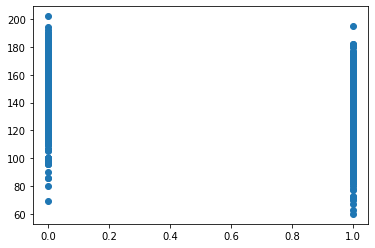

In [78]:
plt.scatter(df['HeartDisease'],df['MaxHR'])

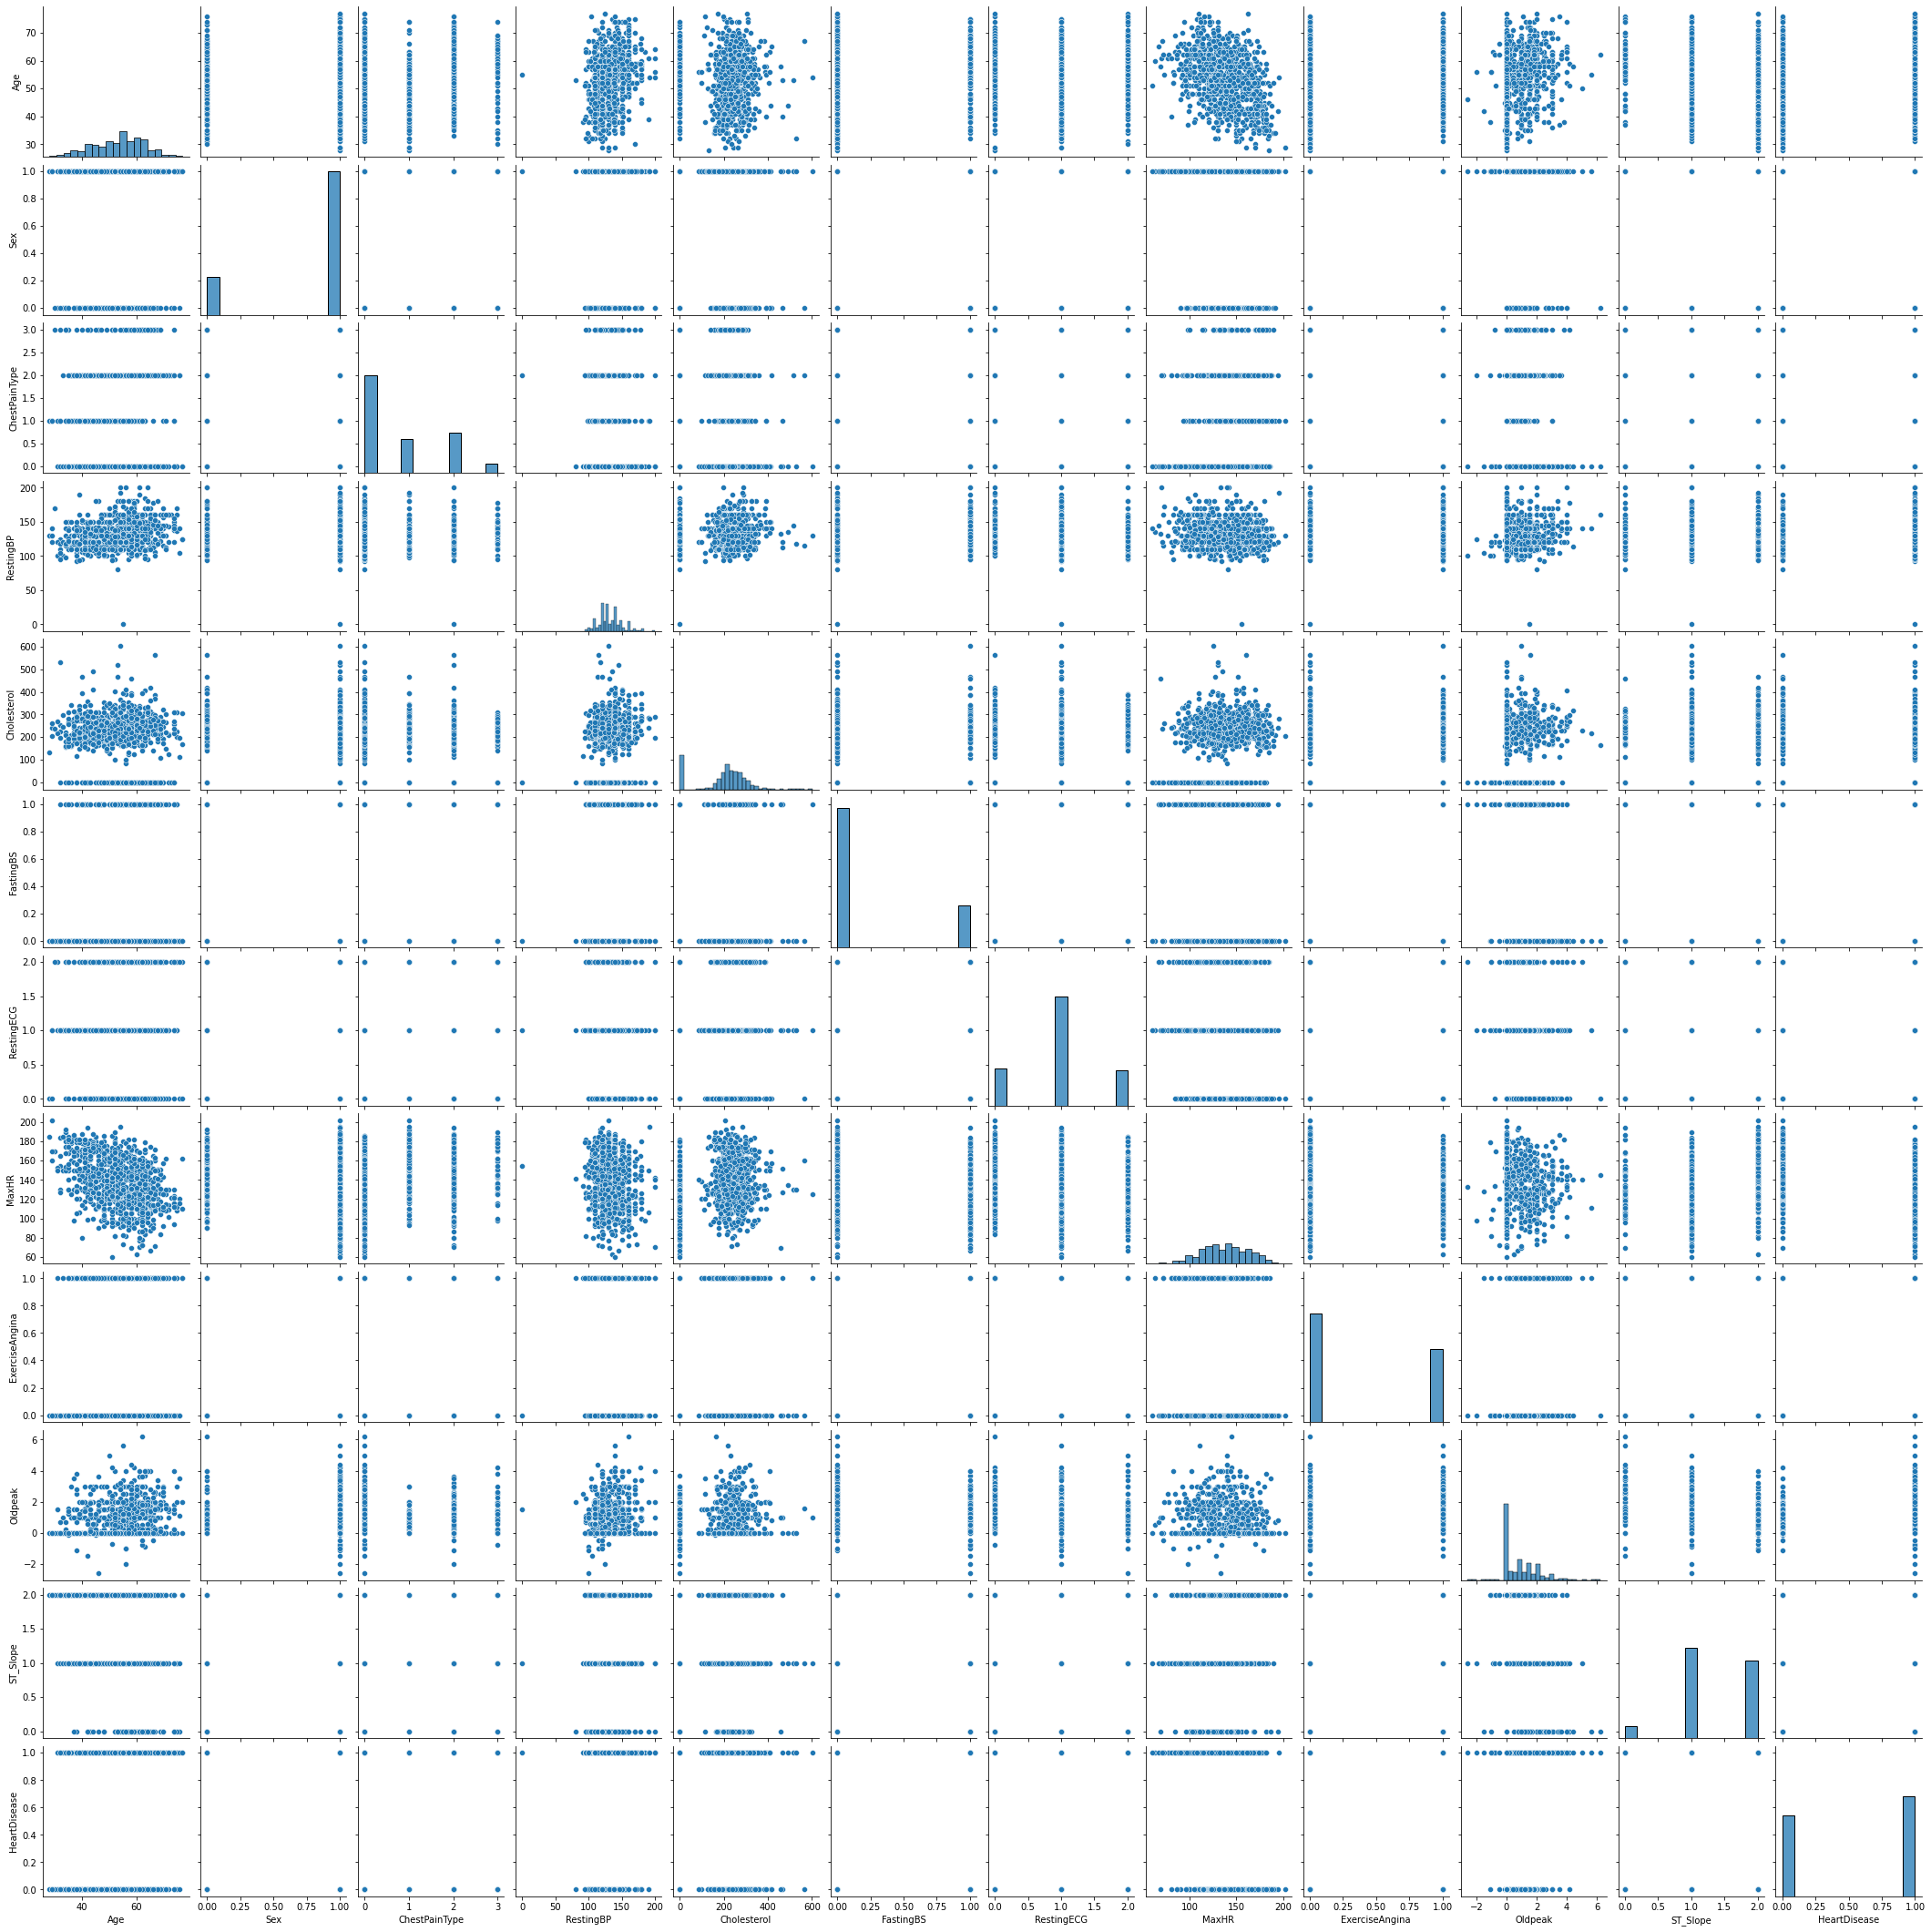

In [79]:
import seaborn as sns
sns.pairplot(df, kind="scatter")
plt.show()

In [80]:
#calculate correlation coefficients for all pairwise combinations
df.corr()

Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750      -0.077150   0.254399    -0.095282   
Sex             0.055750  1.000000      -0.126559   0.005133    -0.200092   
ChestPainType  -0.077150 -0.126559       1.000000  -0.020647     0.067880   
RestingBP       0.254399  0.005133      -0.020647   1.000000     0.100893   
Cholesterol    -0.095282 -0.200092       0.067880   0.100893     1.000000   
FastingBS       0.198039  0.120076      -0.073151   0.070193    -0.260974   
RestingECG     -0.007484  0.071552      -0.072537   0.022656    -0.196544   
MaxHR          -0.382045 -0.189186       0.289123  -0.112135     0.235792   
ExerciseAngina  0.215793  0.190664      -0.354727   0.155101    -0.034166   
Oldpeak         0.258612  0.105734      -0.177377   0.164803     0.050148   
ST_Slope       -0.268264 -0.150693       0.213521  -0.075162     0.111471   
HeartDisease    0.282039  0.305445      -0.386828   0.107589    -0.232741   

                FastingBS  RestingECG     MaxHR  ExerciseAngina   Oldpeak  \
Age              0.198039   -0.007484 -0.382045        0.215793  0.258612   
Sex              0.120076    0.071552 -0.189186        0.190664  0.105734   
ChestPainType   -0.073151   -0.072537  0.289123       -0.354727 -0.177377   
RestingBP        0.070193    0.022656 -0.112135        0.155101  0.164803   
Cholesterol     -0.260974   -0.196544  0.235792       -0.034166  0.050148   
FastingBS        1.000000    0.087050 -0.131438        0.060451  0.052698   
RestingECG       0.087050    1.000000 -0.179276        0.077500 -0.020438   
MaxHR           -0.131438   -0.179276  1.000000       -0.370425 -0.160691   
ExerciseAngina   0.060451    0.077500 -0.370425        1.000000  0.408752   
Oldpeak          0.052698   -0.020438 -0.160691        0.408752  1.000000   
ST_Slope        -0.175774   -0.006778  0.343419       -0.428706 -0.501921   
HeartDisease     0.267291    0.057384 -0.400421        0.494282  0.403951   

                ST_Slope  HeartDisease  
Age            -0.268264      0.282039  
Sex            -0.150693      0.305445  
ChestPainType   0.213521     -0.386828  
RestingBP      -0.075162      0.107589  
Cholesterol     0.111471     -0.232741  
FastingBS      -0.175774      0.267291  
RestingECG     -0.006778      0.057384  
MaxHR           0.343419     -0.400421  
ExerciseAngina -0.428706      0.494282  
Oldpeak        -0.501921      0.403951  
ST_Slope        1.000000     -0.558771  
HeartDisease   -0.558771      1.000000